In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as colors
import matplotlib.text as text
import matplotlib.lines as lines

The SLACS and SLACS for the Masses lens samples were selected from the SDSS LRG sample that has a limiting magnitude of r=19.5 (Eisenstein et al. 2001) instead of what's shown in Figure 12. The BELLS lens sample was selected from the BOSS LRG sample that also has a limiting magnitude of r~19.5 (Eisenstein et al. 2011).

The limiting r-band magnitude and mean seeing for the DES sample is 24.9 mag and ~1.1 arcsec according to Jacobs et al. 2019. The typical seeing for the DECaLS sample is approximately 1 arcsec according to Huang et al. 2019.

### My research:
#### Update 06/05/20 - BELLS is in first 6 months of BOSS, only ~1000 deg2.

SDSS: (SLACS, S4TM, BELLS)
10000 deg2
    S4TM used DR7 (Shu 2017) which has spec area 9380 deg2
r < 17.7 (LRG r < 19.5 *)
      "Atz >0.38, the situation improves as the 4000 ̊A break enters therband. The sensitivity of SDSS ingis sufficient atr∼19.5 to yield a well-measuredg−rcolor, and one can combine this withr−ito constrainthe redshift independently of the SED of the galaxy." (Eisenstein 2001, SDSS-LRG)"
Candidates:
   SLACS: 131
   S4TM: 118
   BELLS: 45


GAMA equatorial regions
180 deg2
r < 19.7


KiDS: (LinKS, Petrillo 2018)
904 deg2
r < 25.0
FWHM r ~ 0.65
Candidates: 308


DES: (Jacobs 2019)
5000 deg2
r < 24.9
mean seeing ~ 1.06 (g-band)
Candidates: 511

DECaLS: (Huang 2019)
9,000 deg2
r < 22.5
FWHM ~ 1.0
Candidates: 335




In [2]:
spectroscopic_surveys = pd.DataFrame({'SURVEY_NAME' : ['GAMA II', 'SLACS', 'S4TM', 'BELLS'],
                                     'PARENT_SURVEY' : ['GAMA', 'SDSS-DR6 MAIN and SDSS-LRG', 'SDSS-DR7', 'BOSS (SDSS-III)'],
                                      # 9380 is SDSS DR7
                                     'AREA_deg2' : [180, 8000, 9380, 1000],
                                     # 19.5 is with the nonsense.. 17.7 truly
                                     'DEPTH_r' : [19.8, 19.5, 19.5, 19.5],
                                      # GAMA equatorial from MagPhys.. I don't know how to find the others...
                                      # SDSS 700000
                                      'FIBRES' : [120114, 700000, 700000, 1500000],
                                      'SPEC_PER_SQDEG' : [667, 87.5, 74.6, 150],
                                     'CANDIDATES' : [47, 131, 118, 45],
                                     'CANDIDATES_PER_SQDEG' : [0.2611, # 47/180
                                                               0.016375, #131/8000
                                                               0.01258, #118/9380
                                                               0.04500]}, #45/10000]},
                                    )#index = [1,2,3,4])

imaging_surveys = pd.DataFrame({'SURVEY_NAME' : ['LinKS','LinKS - GAMA', 'GAMA_KiDS_GZ', 'DES', 'DECALS'],
                                     'PARENT_SURVEY' : ['KiDS DR4', 'KiDS DR4', 'KiDS', 'DES', 'DESI Legacy Imagine Surveys'],
                                'AREA_deg2' : [904, 180, 180, 5000, 9000],
                                     'DEPTH_r' : [25, 25, 25, 24.9, 23.65], #DECaLS is weighted avg b/c overlaps with 5000 of DES
                                     'PSF_PWHM' : [0.65, 0.65, 0.65, 1.06, 1.0], #DECaLS is weighted avg b/c overlaps with 5000 of DES
                                'CANDIDATES' : [308, 47, 29, 511, 335],
                                     'CANDIDATES_PER_SQDEG' : [0.3407, #308/908
                                                               0.2611, #47/180, 
                                                               0.1611, #36/180,
                                                               0.1022, #511/5000, 
                                                               0.03722 ]},#335/9000]},
                              )#index = [1,2,3,4,5])

In [89]:
# separate into individual surveys for plotting
# this was all poorly done...
GAMA = spectroscopic_surveys.iloc[0]
SLACS = spectroscopic_surveys.iloc[1]
S4TM = spectroscopic_surveys.iloc[2]
BELLS = spectroscopic_surveys.iloc[3]

LinKS = imaging_surveys.iloc[0]
LinKS_GAMA = imaging_surveys.iloc[1]
GalaxyZoo = imaging_surveys.iloc[2]
DES = imaging_surveys.iloc[3]
DECaLS = imaging_surveys.iloc[4]


In [90]:
spectroscopic_surveys

,SURVEY_NAME,PARENT_SURVEY,AREA_deg2,DEPTH_r,FIBRES,SPEC_PER_SQDEG,CANDIDATES,CANDIDATES_PER_SQDEG
0,GAMA II,GAMA,180,19.8,120114,667.0,47,0.261100
1,SLACS,SDSS-DR6 MAIN and SDSS-LRG,8000,19.5,700000,87.5,131,0.016375
2,S4TM,SDSS-DR7,9380,19.5,700000,87.5,118,0.012580
3,BELLS,BOSS (SDSS-III),10000,19.5,1500000,150.0,45,0.004500


In [91]:
imaging_surveys

,SURVEY_NAME,PARENT_SURVEY,AREA_deg2,DEPTH_r,PSF_PWHM,CANDIDATES,CANDIDATES_PER_SQDEG
0,LinKS,KiDS DR4,904,25.00,0.65,308,0.34070
1,LinKS - GAMA,KiDS DR4,180,25.00,0.65,47,0.26110
2,GAMA_KiDS_GZ,KiDS,180,25.00,0.65,36,0.20000
3,DES,DES,5000,24.90,1.06,511,0.10220
4,DECALS,DESI Legacy Imagine Surveys,9000,23.65,1.00,335,0.03722


/home/shawn/miniconda3/envs/astroconda/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


NameError: name 'GAMA' is not defined

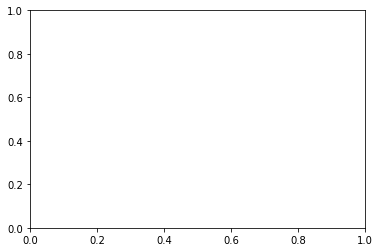

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax3 = fig.add_subplot(111)
ax4 = fig.add_subplot(111)
#ax.set_xlim(1.6, 3.1)
#ax.set_ylim(17, 21)

x1 = np.log10(GAMA.SPEC_PER_SQDEG)
x2 = np.log10(SLACS.SPEC_PER_SQDEG)
x3 = np.log10(S4TM.SPEC_PER_SQDEG)
x4 = np.log10(BELLS.SPEC_PER_SQDEG)
y1 = GAMA.DEPTH_r
y2 = SLACS.DEPTH_r
y3 = S4TM.DEPTH_r
y4 = BELLS.DEPTH_r
c1 = GAMA.CANDIDATES_PER_SQDEG
c2 = SLACS.CANDIDATES_PER_SQDEG
c3 = S4TM.CANDIDATES_PER_SQDEG
c4 = BELLS.CANDIDATES_PER_SQDEG
v1 = GAMA.CANDIDATES_PER_SQDEG*10000
v2 = SLACS.CANDIDATES_PER_SQDEG*10000
v3 = S4TM.CANDIDATES_PER_SQDEG*10000
v4 = BELLS.CANDIDATES_PER_SQDEG*10000


p1 = ax1.scatter(x1, y1, s=v1, cmap = "plasma", alpha = 0.5, label = 'GAMA')
p2 = ax2.scatter(x2, y2, s=v2, cmap = "plasma", alpha = 0.5, label = 'SLACS')
p3 = ax3.scatter(x3, y3, s=v3, cmap = "plasma", alpha = 0.5, label = 'S4TM')
p4 = ax4.scatter(x4, y4, s=v4, cmap = "plasma", alpha = 0.5, label = 'BELLS')

#plt.cbar = plt.colorbar(p1, 
 #                       shrink=1, 
 #                       orientation='vertical',
  #                      ticks=[0.1,0.2,0.3,0.4], 
   #                     spacing='uniform') #, anchor=(0,1.5))
#plt.cbar.set_label('Candidates per $degree^2$', fontsize=10)
plt.xlabel("$log_{10}$(Spectra per deg$^2$)")
plt.ylabel("Limiting Depth - r")
plt.title("Spectroscopic Strong Lens Searches")
plt.legend()
#plt.text(2.755, 19.75, "GAMA II")
#plt.text(1.65, 18.9, "SLACS")
#plt.text(2.05, 17.7, "SLACS-S4TM")
#plt.text(1.775, 17.7, "BOSS")
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/spectroscopy_surveys_plot.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/spectroscopy_surveys_plot.png')

plt.show()

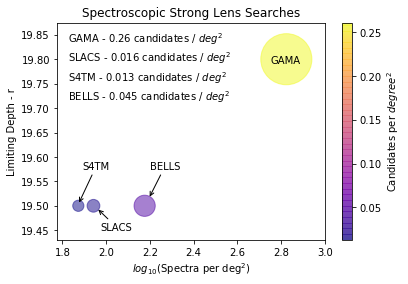

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(1.775, 3.0)
ax.set_ylim(19.43, 19.875)

x = np.log10(spectroscopic_surveys.SPEC_PER_SQDEG)
y = spectroscopic_surveys.DEPTH_r
c = spectroscopic_surveys.CANDIDATES_PER_SQDEG
v = spectroscopic_surveys.CANDIDATES_PER_SQDEG*10000

p = ax.scatter(x, y, s=v, c=c, cmap = "plasma", alpha = 0.5)
plt.cbar = plt.colorbar(p, 
                        shrink=1, 
                        orientation='vertical',
                        ticks=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4], 
                        spacing='uniform') #, anchor=(0,1.5))
plt.cbar.set_label('Candidates per $degree^2$', fontsize=10)
plt.xlabel("$log_{10}$(Spectra per deg$^2$)")
plt.ylabel("Limiting Depth - r")
plt.title("Spectroscopic Strong Lens Searches")
#plt.legend()
plt.text(2.75, 19.7925, "GAMA")
#plt.text(1.8, 19.53, "SLACS")
#plt.text(2.05, 19.53, "S4TM")
#plt.text(1.85, 19.45, "BELLS")

plt.text(1.825, 19.835, 'GAMA - 0.26 candidates / $deg^{2}$')
plt.text(1.825, 19.795, 'SLACS - 0.016 candidates / $deg^{2}$')
plt.text(1.825, 19.755, 'S4TM - 0.013 candidates / $deg^{2}$')
plt.text(1.825, 19.715, 'BELLS - 0.045 candidates / $deg^{2}$')


ax.annotate("BELLS",
            xy=(2.195,19.515), xycoords='data',
            xytext=(2.2,19.575), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("SLACS",
            xy=(1.9575,19.495), xycoords='data',
            xytext=(1.975,19.45), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("S4TM",
            xy=(1.8725,19.503), xycoords='data',
            xytext=(1.8925,19.575), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/spectroscopy_surveys_plot.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/spectroscopy_surveys_plot.png')

plt.show()

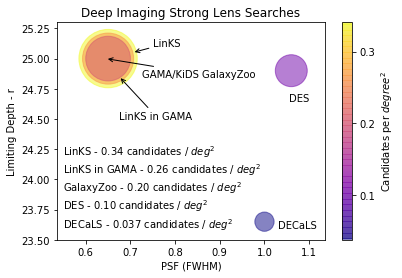

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
#ax.set_xlim(0.7, 1.2)
ax.set_ylim(23.5, 25.3)

x = imaging_surveys.PSF_PWHM
y = imaging_surveys.DEPTH_r
c = imaging_surveys.CANDIDATES_PER_SQDEG
v = imaging_surveys.CANDIDATES_PER_SQDEG*10000

p = ax.scatter(x, y, c=c, s=v, cmap = "plasma", alpha = 0.5)
plt.cbar = plt.colorbar(p, shrink=1, orientation='vertical',ticks=[0.1,0.2,0.3,0.4], spacing='uniform') #, anchor=(0,1.5))
plt.cbar.set_label('Candidates per $degree^2$', fontsize=10)
plt.xlabel("PSF (FWHM)")
plt.ylabel("Limiting Depth - r")
plt.title("Deep Imaging Strong Lens Searches")
#plt.legend()

plt.text(1.055, 24.65, "DES")
plt.text(1.03, 23.6, "DECaLS")

ax.annotate("GAMA/KiDS GalaxyZoo",
            xy=(0.645,25.0), xycoords='data',
            xytext=(0.725,24.85), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("LinKS in GAMA",
            xy=(0.675,24.85), xycoords='data',
            xytext=(0.675,24.5), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

ax.annotate("LinKS",
            xy=(0.705,25.05), xycoords='data',
            xytext=(0.75,25.1), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.text(0.55, 24.2, 'LinKS - 0.34 candidates / $deg^{2}$')
plt.text(0.55, 24.05, 'LinKS in GAMA - 0.26 candidates / $deg^{2}$')
plt.text(0.55, 23.9, 'GalaxyZoo - 0.20 candidates / $deg^{2}$')
plt.text(0.55, 23.75, 'DES - 0.10 candidates / $deg^{2}$')
plt.text(0.55, 23.6, 'DECaLS - 0.037 candidates / $deg^{2}$')


#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/Final_PDFs_for_Paper/imaging_surveys.pdf')
#plt.savefig('/home/shawn/Desktop/gravitational_lensing_research/Lens_Project_Visuals/imaging_surveys.png')

plt.show()